In [11]:
import pandas as pd
import numpy as np
from plotnine import *
import os
import warnings
from tqdm import tqdm_notebook

from tqdm import tqdm, tqdm_notebook
tqdm.pandas()


In [12]:
path = 'C:/Users/choco/Desktop/Github/Github/R-D_Challenge/Challenge19_Car_virus_Detection/\car_attack_detection/input/train/'
print(os.listdir(path))

['Attack_free_HY_Sonata.csv', 'Attack_free_KIA_Soul.csv', 'Fuzzy_dataset_HY_Sonata_train.csv', 'Fuzzy_dataset_KIA_Soul_train.csv', 'Malfunction_1st_dataset_HY_Sonata_train.csv', 'Malfunction_1st_dataset_KIA_Soul_train.csv']


In [13]:
HYUNDAI_SONATA_Attack = pd.read_csv(path + 'Attack_free_HY_Sonata.csv', header=None)
HYUNDAI_SONATA_Fuzzy = pd.read_csv(path + 'Fuzzy_dataset_HY_Sonata_train.csv', header=None)
HYUNDAI_SONATA_Malfunction = pd.read_csv(path + 'Malfunction_1st_dataset_HY_Sonata_train.csv', header=None)

KIA_SOUL_Attack = pd.read_csv(path + 'Attack_free_KIA_Soul.csv', header=None)
KIA_SOUL_Fuzzy = pd.read_csv(path + 'Fuzzy_dataset_KIA_Soul_train.csv', header=None)
KIA_SOUL_Malfunction = pd.read_csv(path + 'Malfunction_1st_dataset_KIA_Soul_train.csv', header=None)

In [14]:
for a in [HYUNDAI_SONATA_Attack, HYUNDAI_SONATA_Fuzzy, HYUNDAI_SONATA_Malfunction]:
    a.columns = ['Timestap', 'CANID', 'DLC', 'DataField', 'Class']
    
for a in [KIA_SOUL_Attack, KIA_SOUL_Fuzzy, KIA_SOUL_Malfunction]:
    a.columns = ['Timestap', 'CANID', 'DLC', 'DataField', 'Class']

In [15]:
T_DataField = []; CANID_NUNIQUE1 = []
R_DataField = []; CANID_NUNIQUE2 = []

In [16]:
HYUNDAI = pd.concat([HYUNDAI_SONATA_Attack, HYUNDAI_SONATA_Fuzzy], axis=0) 
HYUNDAI = pd.concat([HYUNDAI, HYUNDAI_SONATA_Malfunction], axis=0) 

KIA = pd.concat([KIA_SOUL_Attack, KIA_SOUL_Fuzzy], axis=0) 
KIA = pd.concat([KIA, KIA_SOUL_Malfunction], axis=0) 

TRAIN = pd.concat([HYUNDAI, KIA], axis=0)

In [17]:
T_DataField = np.append(T_DataField, TRAIN[TRAIN['Class']=='T']['DataField'].values)
R_DataField = np.append(R_DataField, TRAIN[TRAIN['Class']=='R']['DataField'].values)

In [18]:
set(T_DataField).intersection(set(R_DataField))

{'45 2E 1A 0E 2F 2A 00 7F',
 '45 2E 2A 0E 2F 2A 00 7F',
 '45 2F 16 0E 2F 2A 00 7F',
 '45 2F E0 0D 2F 2A 00 7F',
 '45 2F EC 0D 2F 2A 00 7F',
 '45 2F FE 0D 2F 2A 00 7F',
 '45 30 0E 0E 31 2A 00 7F',
 '45 30 10 0E 30 2A 00 7F',
 '45 30 10 0E 31 2A 00 7F',
 '45 30 18 0E 30 2A 00 7F',
 '45 30 3A 0E 30 2A 00 7F',
 '45 30 C0 0D 30 2A 00 7F',
 '45 30 C4 0D 30 2A 00 7F',
 '45 30 CC 0D 30 2A 00 7F',
 '45 30 E6 0D 30 2A 00 7F',
 '45 30 EC 0D 31 2A 00 7F',
 '45 31 02 0E 31 2A 00 7F',
 '45 31 06 0E 31 2A 00 7F',
 '45 31 10 0E 31 2A 00 7F',
 '45 31 12 0E 31 2A 00 7F',
 '45 31 9C 0D 31 2A 00 7F',
 '45 31 AC 0D 31 2A 00 7F',
 '45 31 AE 0D 31 2A 00 7F',
 '45 31 B0 0D 32 2A 00 7F',
 '45 31 BA 0D 31 2A 00 7F',
 '45 31 BE 0D 31 2A 00 7F',
 '45 31 C6 0D 31 2A 00 7F',
 '45 31 C6 0D 32 2A 00 7F',
 '45 31 C8 0D 31 2A 00 7F',
 '45 31 D4 0D 31 2A 00 7F',
 '45 31 E8 0D 31 2A 00 7F',
 '45 31 EA 0D 31 2A 00 7F',
 '45 31 F4 0D 31 2A 00 7F',
 '45 32 9E 0D 32 2A 00 7F',
 '45 32 AC 0D 32 2A 00 7F',
 '45 32 DA 0D 31 2A 

In [19]:
for i in set(T_DataField).intersection(set(R_DataField)):
    print(i, TRAIN[TRAIN['DataField']==i]['CANID'].unique())

45 30 C0 0D 30 2A 00 7F ['0316']
45 2F E0 0D 2F 2A 00 7F ['0316']
45 32 FE 0D 32 2A 00 7F ['316' '0316']
45 31 B0 0D 32 2A 00 7F ['0316']
45 31 AE 0D 31 2A 00 7F ['0316']
45 30 18 0E 30 2A 00 7F ['0316']
45 32 FC 0D 32 2A 00 7F ['316' '0316']
45 31 D4 0D 31 2A 00 7F ['316' '0316']
45 31 BE 0D 31 2A 00 7F ['0316']
45 30 EC 0D 31 2A 00 7F ['0316']
45 30 0E 0E 31 2A 00 7F ['0316']
45 32 AC 0D 32 2A 00 7F ['316' '0316']
45 31 BA 0D 31 2A 00 7F ['0316']
45 31 F4 0D 31 2A 00 7F ['0316']
45 32 F4 0D 31 2A 00 7F ['316' '0316']
45 31 9C 0D 31 2A 00 7F ['0316']
45 31 10 0E 31 2A 00 7F ['316' '0316']
45 2F FE 0D 2F 2A 00 7F ['0316']
45 31 E8 0D 31 2A 00 7F ['0316']
45 31 C6 0D 32 2A 00 7F ['316' '0316']
45 31 C8 0D 31 2A 00 7F ['316' '0316']
45 32 DE 0D 32 2A 00 7F ['316' '0316']
45 30 3A 0E 30 2A 00 7F ['316' '0316']
45 31 C6 0D 31 2A 00 7F ['316' '0316']
45 31 02 0E 31 2A 00 7F ['316' '0316']
45 2F EC 0D 2F 2A 00 7F ['0316']
45 2F 16 0E 2F 2A 00 7F ['0316']
45 31 AC 0D 31 2A 00 7F ['316' '0316'

In [20]:
agg = TRAIN.groupby(['CANID'])['Class'].agg({'nunique'}).reset_index()
CANID_NUNIQUE1 = np.append(CANID_NUNIQUE1, agg[agg['nunique']==1]['CANID'].values)
CANID_NUNIQUE2 = np.append(CANID_NUNIQUE2, agg[agg['nunique']==2]['CANID'].values)

CANID_UNIQUE = TRAIN.groupby(['CANID'])['Class'].agg({'unique'}).reset_index()
DATAFILE_NUNIQUE = TRAIN.groupby(['CANID'])['DataField'].agg({'nunique'}).reset_index()

In [21]:
set(CANID_NUNIQUE1).intersection(set(CANID_NUNIQUE2))

set()

## 제출 파일 로드

In [22]:
path = 'C:/Users/choco/Desktop/Github/Github/R-D_Challenge/Challenge19_Car_virus_Detection/\car_attack_detection/input/test/'
print(os.listdir(path))
File1 = pd.read_csv(path + 'File1.csv', header=None)
File2 = pd.read_csv(path + 'File2.csv', header=None)
File3 = pd.read_csv(path + 'File3.csv', header=None)
File4 = pd.read_csv(path + 'File4.csv', header=None)

TEST = pd.DataFrame()
for a in [File1, File2, File3, File4]:
    a.columns = ['Number', 'Timestap', 'CANID', 'DLC', 'DataField']

for df in [File1, File2, File3, File4]:
    TEST = pd.concat([TEST, df], axis=0)
    
TEST = TEST.reset_index(drop=True)
TEST['Number'] = TEST.index + 1
TEST.head()

['File1.csv', 'File2.csv', 'File3.csv', 'File4.csv']


,Number,Timestap,CANID,DLC,DataField
0,1,1.513926e+09,0370,8,00 20 00 00 00 00 00 00
1,2,1.513926e+09,043F,8,00 40 60 FF 65 B4 08 00
2,3,1.513926e+09,018F,8,FE 62 00 00 00 3C 00 00
3,4,1.513926e+09,0260,8,1B 24 24 30 FF 8F 6D 3A
4,5,1.513926e+09,02A0,8,64 00 83 1D 16 05 E3 00


In [24]:
import matplotlib.font_manager as fm
fontpath = 'C:/Users/choco/Anaconda3/lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath).get_name()

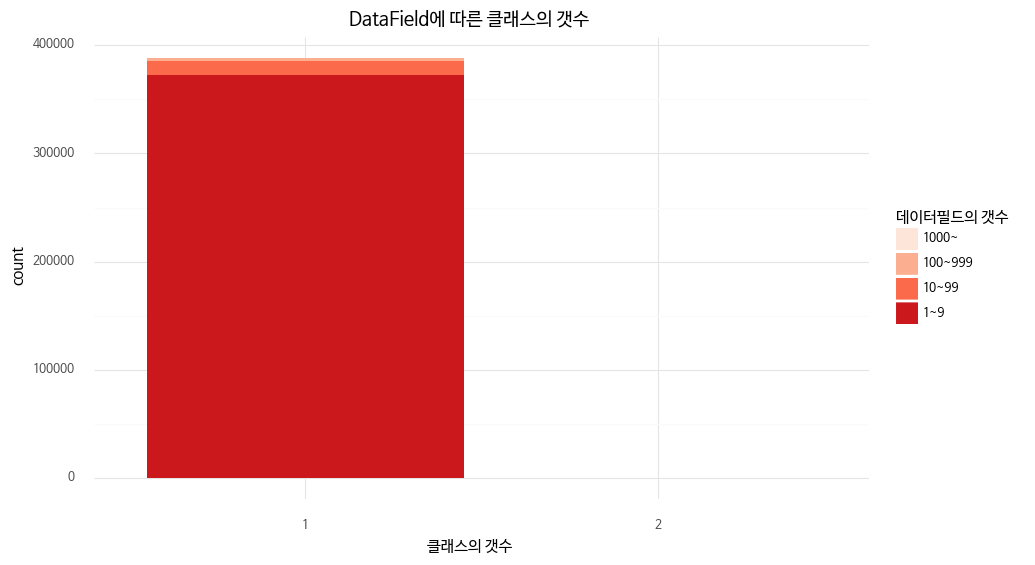

<ggplot: (91285022093)>

In [25]:
agg = TRAIN.groupby(['DataField'])['Class'].agg({'nunique'}).reset_index().rename(columns = {'nunique' : '클래스의 갯수'})
agg1 = TRAIN.groupby(['DataField'])['Class'].agg({'count'}).reset_index().rename(columns = {'count' : '데이터필드의 갯수'})
agg = pd.merge(agg, agg1, how='left')
agg['클래스의 갯수'] = agg['클래스의 갯수'].astype(str)
agg['데이터필드의 갯수'] = agg['데이터필드의 갯수'].apply(lambda x: '1~9' if x < 10
                                                              else ('10~99' if ((x < 100)&(x>=10))
                                                                else ('100~999' if ((x<1000)&(x>=100)) else '1000~')))

(ggplot(agg)
 + geom_bar(aes(x='클래스의 갯수',fill = '데이터필드의 갯수'),  position = "stack") 
 + scale_fill_brewer(palette = "Reds")
 + ggtitle("DataField에 따른 클래스의 갯수") 
 + theme_minimal() + theme(text=element_text(family=font), figure_size=(10, 6)))

In [26]:
agg['클래스의 갯수'].value_counts()

1    388073
2        40
Name: 클래스의 갯수, dtype: int64

In [36]:
for i in agg[agg['클래스의 갯수'] == '2']['DataField'].unique():
    print(TRAIN[TRAIN['DataField']==i]['CANID'].unique())

['0316']
['0316']
['0316']
['0316']
['0316']
['0316']
['0316']
['0316']
['0316']
['0316']
['316' '0316']
['0316']
['0316']
['0316']
['0316']
['0316']
['316' '0316']
['316' '0316']
['316' '0316']
['0316']
['0316']
['316' '0316']
['0316']
['0316']
['0316']
['0316']
['316' '0316']
['316' '0316']
['316' '0316']
['316' '0316']
['0316']
['316' '0316']
['0316']
['0316']
['316' '0316']
['316' '0316']
['316' '0316']
['316' '0316']
['316' '0316']
['316' '0316']


In [37]:
TRAIN[TRAIN['CANID']=='0316']['Class'].unique()

array(['R', 'T'], dtype=object)

In [38]:
TRAIN[TRAIN['CANID']=='316']['Class'].unique()

array(['R'], dtype=object)

In [34]:
TRAIN[TRAIN['DataField']=='45 30 C0 0D 30 2A 00 7F']

,Timestap,CANID,DLC,DataField,Class
5607,1.513925e+09,0316,8,45 30 C0 0D 30 2A 00 7F,R
12312,1.513925e+09,0316,8,45 30 C0 0D 30 2A 00 7F,R
1303,1.513925e+09,0316,8,45 30 C0 0D 30 2A 00 7F,T
3397,1.513925e+09,0316,8,45 30 C0 0D 30 2A 00 7F,T
4147,1.513925e+09,0316,8,45 30 C0 0D 30 2A 00 7F,R
5226,1.513925e+09,0316,8,45 30 C0 0D 30 2A 00 7F,R
5259,1.513925e+09,0316,8,45 30 C0 0D 30 2A 00 7F,R
9261,1.513925e+09,0316,8,45 30 C0 0D 30 2A 00 7F,R
9276,1.513925e+09,0316,8,45 30 C0 0D 30 2A 00 7F,R
10519,1.513925e+09,0316,8,45 30 C0 0D 30 2A 00 7F,R


In [46]:
len(set(TEST['CANID'].unique()).intersection(set(TRAIN['CANID'].unique())))

50

In [41]:
print("" : len(set(TEST['DataField'].unique()).difference(set(TRAIN['DataField'].unique()))))

272153

In [45]:
print(":", len(set(TEST['DataField'].unique()).intersection(set(TRAIN['DataField'].unique()))))

: 55227


In [47]:
55227/272153

0.2029262951354569

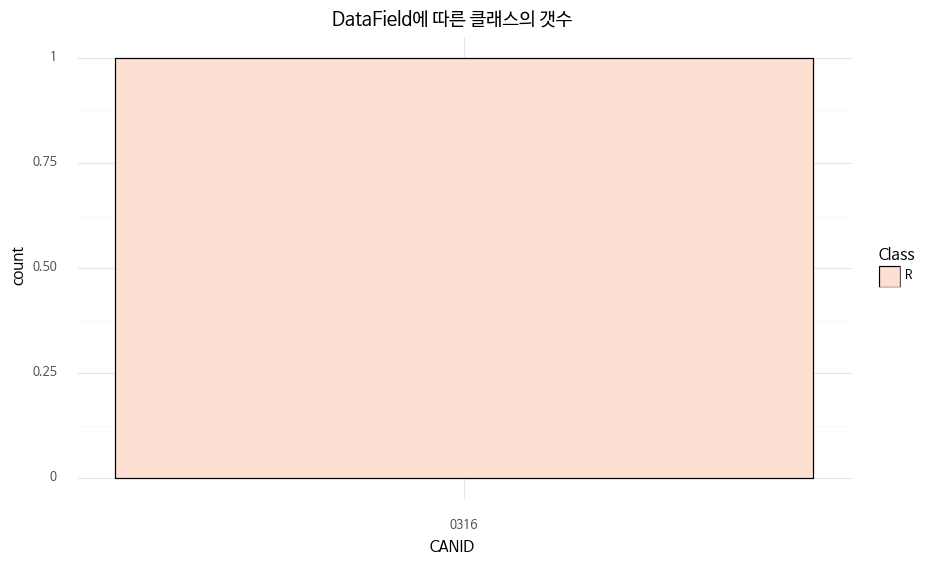

<ggplot: (-9223371945496847893)>

In [33]:
agg1 = TRAIN[TRAIN['DataField']=='45 30 C0 0D 30 2A 00 7F'].groupby(['CANID'])['Class'].agg({'nunique','unique'}).reset_index().rename(columns={'nunique':'클래스의 종류의 수', 'unique':'Class'})
agg1['Class'] = agg1['Class'].astype(str).apply(lambda x: x[2])
(ggplot(agg1)
 + geom_bar(aes(x='CANID', fill='Class'),  position = "identity", colour="black") 
 + scale_fill_brewer(palette = "Reds")
 + ggtitle("DataField에 따른 클래스의 갯수") 
 + theme_minimal() + theme(text=element_text(family=font), figure_size=(10, 6)))

## Rule 1 : CANID가 1인 값들에 속하면 해당하는 Class로 분류 

In [48]:
set(TEST['CANID'].unique()).difference(set(np.append(CANID_NUNIQUE1,CANID_NUNIQUE2)))

set()

In [49]:
len(CANID_NUNIQUE1),len(CANID_NUNIQUE2)

(50, 50)

In [50]:
CANID_NUNIQUE1_TABLE = pd.DataFrame()
CANID_NUNIQUE1_TABLE['CANID'] = CANID_NUNIQUE1
CANID_NUNIQUE1_TABLE = pd.merge(CANID_NUNIQUE1_TABLE, CANID_UNIQUE,how='left',on='CANID')

In [51]:
CANID_NUNIQUE1_TABLE['RULE1'] = CANID_NUNIQUE1_TABLE['unique'].astype(str).apply(lambda x: x[2])
CANID_NUNIQUE1_TABLE = CANID_NUNIQUE1_TABLE[['CANID', 'RULE1']]
# CANID_NUNIQUE1_TABLE = pd.merge(CANID_NUNIQUE1_TABLE, DATAFILE_NUNIQUE ,how='left',on='CANID')
CANID_NUNIQUE1_TABLE.head() 

,CANID,RULE1
0,002,R
1,018,R
2,034,R
3,042,R
4,043,R


In [52]:
TEST = TEST.merge(CANID_NUNIQUE1_TABLE, how='left', on='CANID')

In [53]:
TEST['RULE1'].isnull().sum() / TEST.shape[0]

1.0

## Rule 2 : CANID가 2인 값들에 속하면 DataField에 의해 해당하는 Class로 분류 

In [54]:
T_solution = pd.DataFrame()
T_solution['DataField'] = list(set(T_DataField))
T_solution['RULE2'] = 'T'

R_solution = pd.DataFrame()
R_solution['DataField'] = list(set(R_DataField))
R_solution['RULE2'] = 'R'

SOLUTION = pd.concat([T_solution, R_solution],axis=0).reset_index(drop=True)
SOLUTION = SOLUTION[SOLUTION['DataField'] != '00 00 00 00 00 00 00 00']

TEST = TEST.merge(SOLUTION, how='left', on='DataField')

In [55]:
TEST['RULE2'].isnull().sum() / TEST.shape[0]

0.38187036934536284

## Rule 3 : 00 00 00 00 00 00 00 00의 경우 CANID가 0000인지 여부에 따라 Class 분류 

In [ ]:
T_CANID_0 = []
R_CANID_0 = []

In [ ]:
TEST.loc[TEST['DataField']=='00 00 00 00 00 00 00 00', 'RULE2'] = 'R'
TEST.loc[(TEST['DataField']=='00 00 00 00 00 00 00 00') & (TEST['CANID']=='0000'), 'RULE2'] = 'T'

In [ ]:
TEST['RULE'] = TEST['RULE2'].fillna(TEST['RULE1'])

In [ ]:
TEST['RULE'].isnull().sum()

In [ ]:
TEST['RULE1'].isnull().sum()

In [ ]:
TEST.shape

## Rule 4 : 새로운 유형인 경우 Boosting Model을 이용해서 분류 

In [ ]:
def transform_transaction_catcols(df1, df2):
    for cat_col in tqdm_notebook(categorical_features): 
        # Get the indices for NaN values
        trn_null_ind = [ind for ind, val in enumerate(df1[cat_col].isnull().values) if val == True]
        ts_null_ind = [ind for ind, val in enumerate(df2[cat_col].isnull().values) if val == True]
        
        uniq_train_cat_val , uniq_test_cat_val = set(df1[cat_col].dropna() ), set(df2[cat_col].dropna() )
        common_cat_val = uniq_train_cat_val.intersection(uniq_test_cat_val)
        df1.loc[ ~df1[cat_col].isin( common_cat_val), cat_col ] = -99999
        df2.loc[ ~df2[cat_col].isin( common_cat_val), cat_col ] = -99999
        
        # Replace the value for orignal NaN values
        df1.loc[df1.index.isin(trn_null_ind), cat_col] = np.NaN
        df2.loc[df2.index.isin(ts_null_ind), cat_col] = np.NaN
        
    del uniq_train_cat_val, uniq_test_cat_val, common_cat_val; gc.collect()

    return df1, df2

In [ ]:
def period_window(df, window=100):
    df[f'period_window_{window}'] = df.rolling(window, min_periods=1).Timestap.progress_apply(lambda dt: dt.max() - dt.min())
    return df

def can_id_freq_window(df, window=100):
    def get_freq(data):
        data = pd.Series(data)
        return data.value_counts()[data.values[-1]]
    
    df[f'can_id_freq_window_{window}'] = df.rolling(window, min_periods=1).CANID.progress_apply(get_freq)
    return df

In [64]:
TRAIN = period_window(TRAIN)
TEST = period_window(TEST)

0it [00:00, ?it/s]C:\Users\choco\Anaconda3\lib\site-packages\tqdm\_tqdm.py:677: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  result = getattr(df, df_function)(wrapper, **kwargs)
2320454it [00:25, 91749.89it/s] 
1391137it [00:15, 89457.85it/s] 


In [65]:
TRAIN['Timestap'] = pd.to_datetime(TRAIN['Timestap'], unit='s')
TEST['Timestap'] = pd.to_datetime(TEST['Timestap'], unit='s')

TRAIN['minute'] = TRAIN['Timestap'].dt.minute
TRAIN['second'] = TRAIN['Timestap'].dt.second

TEST['minute'] = TEST['Timestap'].dt.minute
TEST['second'] = TEST['Timestap'].dt.second

TRAIN['DataField_len'] = TRAIN['DataField'].astype(str).apply(lambda x: len(x.split(' ')))
TEST['DataField_len'] = TEST['DataField'].astype(str).apply(lambda x: len(x.split(' ')))

TRAIN_df = pd.DataFrame()
TEST_df = pd.DataFrame()

for num in tqdm_notebook(TRAIN['DataField_len'].unique()):
    TRAIN__df_field = TRAIN[TRAIN['DataField_len']==num].reset_index(drop=True)
    TEST__df_field = TEST[TEST['DataField_len']==num].reset_index(drop=True)
    for num1 in np.arange(num):
        TRAIN__df_field['DataField_{}'.format(num1)] = TRAIN__df_field['DataField'].astype(str).apply(lambda x: x.split(' ')[num1])
        TEST__df_field['DataField_{}'.format(num1)] = TEST__df_field['DataField'].astype(str).apply(lambda x: x.split(' ')[num1])
    TRAIN_df = pd.concat([TRAIN_df, TRAIN__df_field], axis=0).reset_index(drop=True)
    TEST_df = pd.concat([TEST_df, TEST__df_field], axis=0).reset_index(drop=True)
    
from sklearn.preprocessing import LabelEncoder
columns = [c for c in TEST_df.columns if c not in ['Number', 'Class','RULE1','RULE2','RULE']]
for col in tqdm_notebook(columns):
    if TRAIN_df[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(TRAIN_df[col].astype(str).values) + list(TEST_df[col].astype(str).values))
        TRAIN_df[col] = le.transform(list(TRAIN_df[col].astype(str).values))
        TEST_df[col] = le.transform(list(TEST_df[col].astype(str).values))   
        
TRAIN_df = can_id_freq_window(TRAIN_df)
TEST_df = can_id_freq_window(TEST_df)

C:\Users\choco\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\choco\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



81848it [02:57, 863.81it/s]

KeyboardInterrupt: 

In [71]:
import matplotlib.font_manager as fm
fontpath = 'C:/Users/choco/Anaconda3/lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath).get_name()

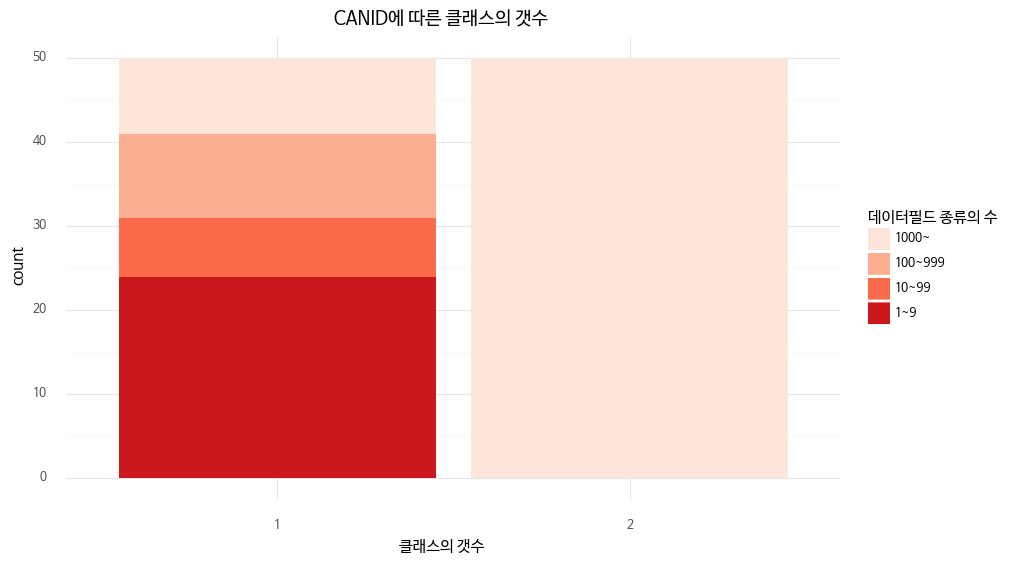

<ggplot: (-9223371927041987854)>

In [74]:
agg = TRAIN.groupby(['CANID'])['Class'].agg({'nunique'}).reset_index().rename(columns = {'nunique' : '클래스의 갯수'})
agg1 = TRAIN.groupby(['CANID'])['DataField'].agg({'nunique'}).reset_index().rename(columns = {'nunique' : '데이터필드 종류의 수'})
agg = pd.merge(agg, agg1, how='left')
agg['클래스의 갯수'] = agg['클래스의 갯수'].astype(str)
agg['데이터필드 종류의 수'] = agg['데이터필드 종류의 수'].apply(lambda x: '1~9' if x < 10
                                                              else ('10~99' if ((x < 100)&(x>=10))
                                                                else ('100~999' if ((x<1000)&(x>=100)) else '1000~')))

(ggplot(agg)
 + geom_bar(aes(x='클래스의 갯수',fill = '데이터필드 종류의 수'),  position = "stack") 
 + scale_fill_brewer(palette = "Reds")
 + ggtitle("CANID에 따른 클래스의 갯수") 
 + theme_minimal() + theme(text=element_text(family=font), figure_size=(10, 6)))

In [ ]:
agg = TRAIN.groupby(['DataField'])['Class'].agg({'nunique'}).reset_index().rename(columns = {'nunique' : '클래스의 갯수'})
agg1 = TRAIN.groupby(['DataField'])['Class'].agg({'count'}).reset_index().rename(columns = {'count' : '데이터필드의 갯수'})
agg = pd.merge(agg, agg1, how='left')
agg['클래스의 갯수'] = agg['클래스의 갯수'].astype(str)
agg['데이터필드의 갯수'] = agg['데이터필드의 갯수'].apply(lambda x: '1~9' if x < 10
                                                              else ('10~99' if ((x < 100)&(x>=10))
                                                                else ('100~999' if ((x<1000)&(x>=100)) else '1000~')))

(ggplot(agg)
 + geom_bar(aes(x='클래스의 갯수',fill = '데이터필드의 갯수'),  position = "stack") 
 + scale_fill_brewer(palette = "Reds")
 + ggtitle("DataField에 따른 클래스의 갯수") 
 + theme_minimal() + theme(text=element_text(family=font), figure_size=(10, 6)))

In [ ]:
agg['클래스의 갯수'].value_counts()

In [ ]:
class_binary = {'R':0, 'T':1}
TRAIN_df['Class'] = TRAIN_df['Class'].map(class_binary)
TRAIN_df['Number'] = TRAIN_df.index

In [ ]:
features = [c for c in TRAIN_df.columns if c not in ['Class', 'Number', 'Timestap','RULE1','RULE2','RULE']]
features_columns = features
categorical_features = ['CANID','DataField', 'DLC', 'DataField_0','DataField_1','DataField_2','DataField_3',
                       'DataField_4','DataField_5','DataField_7','minute','second']

In [ ]:
del TRAIN_df['Timestap'] ; # del TRAIN_df['DataField']
del test_df['Timestap'] ; # del test_df['DataField']

In [ ]:
import gc 
TRAIN_df, TEST_df = transform_transaction_catcols(TRAIN_df, TEST_df)

In [ ]:
for col in tqdm_notebook( features ):
    if TRAIN_df[col].dtype=='O':
        print(col)
        TRAIN_df[col] = TRAIN_df[col].fillna('unseen_before_label')
        TEST_df[col]  = TEST_df[col].fillna('unseen_before_label')
        
        TRAIN_df[col] = TRAIN_df[col].astype(str)
        TEST_df[col] = TEST_df[col].astype(str)
        
        le = LabelEncoder()
        le.fit(list(TRAIN_df[col])+list(TEST_df[col]))
        TRAIN_df[col] = le.transform(TRAIN_df[col])
        TEST_df[col]  = le.transform(TEST_df[col])
    
    elif col in categorical_features:
        TRAIN_df[col] = TRAIN_df[col].astype(float).fillna(-999)
        TEST_df[col]  = TEST_df[col].astype(float).fillna(-999)
        
        le = LabelEncoder()
        le.fit(list(TRAIN_df[col])+list(TEST_df[col]))
        TRAIN_df[col] = le.transform(TRAIN_df[col])
        TEST_df[col]  = le.transform(TEST_df[col])

### Tree Based Model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
import random 
import os 
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [ ]:
SEED = 42
seed_everything(SEED)
TARGET = 'Class'

In [ ]:
########################### Model params
cat_params = {
                'n_estimators':5000,
                'learning_rate': 0.07,
                'eval_metric':'F1',
                'loss_function':'Logloss',
                'random_seed':SEED,
                'metric_period':500,
                'od_wait':500,
                'task_type':'GPU',
                'depth': 8,
                #'colsample_bylevel':0.7,
                } 

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit, GroupKFold
import gc

NFOLDS = 5
folds = GroupKFold(n_splits=NFOLDS)

TEST_df[TARGET] = 0.5 
    
X ,y = TRAIN_df[features_columns], TRAIN_df[TARGET]    
P, p_y = TEST_df[features_columns], TEST_df[TARGET]  
    
split_groups = TRAIN_df['minute']

oofs = TRAIN_df[['Number',TARGET]]
preds = TEST_df[['Number',TARGET]] 
preds['Class'] = 0
gc.collect()
    
oof = np.zeros(len(TRAIN_df))
predictions = np.zeros(len(TEST_df))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y, groups=split_groups)):
    print('Fold:',fold_)
        
    estimator = CatBoostClassifier(**cat_params)        
    estimator.fit(
        X.iloc[trn_idx,:],y[trn_idx],
        eval_set=(X.iloc[val_idx,:], y[val_idx]),
        cat_features=categorical_features,
        use_best_model=True,
        verbose=True)

    oof_preds = estimator.predict_proba(X.iloc[val_idx,:])[:,1]
    oof[val_idx] = (oof_preds - oof_preds.min())/(oof_preds.max() - oof_preds.min())
    preds['Class'] += estimator.predict_proba(P)[:,1]/NFOLDS
        
    gc.collect()

In [ ]:
feature_score = pd.DataFrame()
feature_score['feature'] = features
feature_score['score'] = estimator.get_feature_importance()
feature_score = feature_score.sort_values(by='score', ascending=False)
feature_score

In [ ]:
from sklearn.metrics import f1_score

best_threshold_dict = {}
for threshold in tqdm_notebook(np.linspace(0,1, 100)):
    temp_f1_score = f1_score(y, [ 1 if x >=threshold else 0 for x in oof])
    best_threshold_dict[threshold] = temp_f1_score

In [ ]:
best_threshold_dict

In [ ]:
max(best_threshold_dict.values())

In [ ]:
pd.DataFrame(oof).hist()

In [ ]:
preds['Class'] = preds['Class'].apply(lambda x: 'R' if x <= 0.7676767676767677 else 'T')

In [ ]:
preds = preds.sort_values(by='Number')
TEST['RULE3'] = preds['Class']

In [ ]:
TEST['RULE'] = TEST['RULE'].fillna(TEST['RULE3'])